In [2]:
from jqdata import *
import pandas as pd
pd.options.display.max_rows=3000
pd.options.display.max_columns=3000
from sklearn.feature_selection import SelectPercentile, chi2
import numpy as np
import sys
numpy.set_printoptions(threshold=sys.maxsize)
import seaborn as sns
from matplotlib.pyplot import bar
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tushare as ts
from jqdata import macro
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
pd.set_option('precision',2) 

In [32]:
p = get_price('000016.XSHG',start_date='2010-01-01',end_date = '2019-06-01')

In [33]:
r = price['close'][1:].values - price['close'][:-1].values
p = price[:-1]
p['r'] = r
p.head()

,open,close,high,low,volume,money
2010-01-04,2565.11,2514.65,2570.15,2514.24,2.73e+09,3.65e+10
2010-01-05,2526.29,2543.99,2560.67,2487.05,3.54e+09,5.08e+10
2010-01-06,2538.28,2514.01,2549.57,2513.36,2.96e+09,4.34e+10
2010-01-07,2516.06,2463.76,2527.43,2450.40,3.20e+09,4.46e+10
2010-01-08,2453.06,2466.16,2470.02,2432.01,2.27e+09,3.23e+10
2010-01-11,2584.53,2478.81,2584.53,2467.67,4.08e+09,5.98e+10
2010-01-12,2472.62,2508.04,2513.30,2435.16,3.80e+09,5.16e+10
2010-01-13,2444.24,2399.64,2457.90,2396.47,4.96e+09,6.48e+10
2010-01-14,2412.63,2422.77,2428.70,2384.16,3.06e+09,3.97e+10
2010-01-15,2423.13,2427.81,2445.20,2402.90,2.60e+09,3.47e+10


In [60]:
for i in [3,5,10,20,30]:
    p['mv%r'%i]=0
    p['dif_mv%r'%i]=0
    p['bear_power%r'%i]=0 
    p['bull_power%r'%i] = 0
    p['r_var%r'%i]=0
for i in range(len(p)):
    if i <3:
        pass
    elif i <5:
        p['mv3'].iloc[i] = np.mean(p['close'].iloc[i-3:i])
        p['dif_mv3'].iloc[i] = p['close'].iloc[i]-p['mv3'].iloc[i]
        p['bear_power3'].iloc[i] = (p['low'].iloc[i] - p['mv3'].iloc[i])/p['close'].iloc[i]
        p['bull_power3'].iloc[i] = (p['high'].iloc[i] - p['mv3'].iloc[i])/p['close'].iloc[i]
        p['r_var3'].iloc[i] = np.var(p['r'].iloc[i-3:i])
    elif i <10:
        p['mv3'].iloc[i] = np.mean(p['close'].iloc[i-3:i])
        p['dif_mv3'].iloc[i] = p['close'].iloc[i]-p['mv3'].iloc[i]
        p['bear_power3'].iloc[i] = (p['low'].iloc[i] - p['mv3'].iloc[i])/p['close'].iloc[i]
        p['bull_power3'].iloc[i] = (p['high'].iloc[i] - p['mv3'].iloc[i])/p['close'].iloc[i]
        p['r_var3'].iloc[i] = np.var(p['r'].iloc[i-3:i])

        p['mv5'].iloc[i] = np.mean(p['close'].iloc[i-5:i])
        p['dif_mv5'].iloc[i] = p['close'].iloc[i]-p['mv5'].iloc[i]
        p['bear_power5'].iloc[i] = (p['low'].iloc[i] - p['mv5'].iloc[i])/p['close'].iloc[i]
        p['bull_power5'].iloc[i] = (p['high'].iloc[i] - p['mv5'].iloc[i])/p['close'].iloc[i]
        p['r_var5'].iloc[i] = np.var(p['r'].iloc[i-5:i])
    elif i < 20:
        p['mv3'].iloc[i] = np.mean(p['close'].iloc[i-3:i])
        p['dif_mv3'].iloc[i] = p['close'].iloc[i]-p['mv3'].iloc[i]
        p['bear_power3'].iloc[i] = (p['low'].iloc[i] - p['mv3'].iloc[i])/p['close'].iloc[i]
        p['bull_power3'].iloc[i] = (p['high'].iloc[i] - p['mv3'].iloc[i])/p['close'].iloc[i]
        p['r_var3'].iloc[i] = np.var(p['r'].iloc[i-3:i])

        p['mv5'].iloc[i] = np.mean(p['close'].iloc[i-5:i])
        p['dif_mv5'].iloc[i] = p['close'].iloc[i]-p['mv5'].iloc[i]
        p['bear_power5'].iloc[i] = (p['low'].iloc[i] - p['mv5'].iloc[i])/p['close'].iloc[i]
        p['bull_power5'].iloc[i] = (p['high'].iloc[i] - p['mv5'].iloc[i])/p['close'].iloc[i]
        p['r_var5'].iloc[i] = np.var(p['r'].iloc[i-5:i])

        p['mv10'].iloc[i] = np.mean(p['close'].iloc[i-10:i])
        p['dif_mv10'].iloc[i] = p['close'].iloc[i]-p['mv10'].iloc[i]
        p['bear_power10'].iloc[i] = (p['low'].iloc[i] - p['mv10'].iloc[i])/p['close'].iloc[i]
        p['bull_power10'].iloc[i] = (p['high'].iloc[i] - p['mv10'].iloc[i])/p['close'].iloc[i]
        p['r_var10'].iloc[i] = np.var(p['r'].iloc[i-10:i])
    elif i < 30:
        p['mv3'].iloc[i] = np.mean(p['close'].iloc[i-3:i])
        p['dif_mv3'].iloc[i] = p['close'].iloc[i]-p['mv3'].iloc[i]
        p['bear_power3'].iloc[i] = (p['low'].iloc[i] - p['mv3'].iloc[i])/p['close'].iloc[i]
        p['bull_power3'].iloc[i] = (p['high'].iloc[i] - p['mv3'].iloc[i])/p['close'].iloc[i]
        p['r_var3'].iloc[i] = np.var(p['r'].iloc[i-3:i])

        p['mv5'].iloc[i] = np.mean(p['close'].iloc[i-5:i])
        p['dif_mv5'].iloc[i] = p['close'].iloc[i]-p['mv5'].iloc[i]
        p['bear_power5'].iloc[i] = (p['low'].iloc[i] - p['mv5'].iloc[i])/p['close'].iloc[i]
        p['bull_power5'].iloc[i] = (p['high'].iloc[i] - p['mv5'].iloc[i])/p['close'].iloc[i]
        p['r_var5'].iloc[i] = np.var(p['r'].iloc[i-5:i])

        p['mv10'].iloc[i] = np.mean(p['close'].iloc[i-10:i])
        p['dif_mv10'].iloc[i] = p['close'].iloc[i]-p['mv10'].iloc[i]
        p['bear_power10'].iloc[i] = (p['low'].iloc[i] - p['mv10'].iloc[i])/p['close'].iloc[i]
        p['bull_power10'].iloc[i] = (p['high'].iloc[i] - p['mv10'].iloc[i])/p['close'].iloc[i]
        p['r_var10'].iloc[i] = np.var(p['r'].iloc[i-10:i])

        p['mv20'].iloc[i] = np.mean(p['close'].iloc[i-20:i])
        p['dif_mv20'].iloc[i] = p['close'].iloc[i]-p['mv20'].iloc[i]
        p['bear_power20'].iloc[i] = (p['low'].iloc[i] - p['mv20'].iloc[i])/p['close'].iloc[i]
        p['bull_power20'].iloc[i] = (p['high'].iloc[i] - p['mv20'].iloc[i])/p['close'].iloc[i]
        p['r_var20'].iloc[i] = np.var(p['r'].iloc[i-20:i])
    else:
        p['dif_mv3'].iloc[i] = p['close'].iloc[i]-p['mv3'].iloc[i]
        p['bear_power3'].iloc[i] = (p['low'].iloc[i] - p['mv3'].iloc[i])/p['close'].iloc[i]
        p['bull_power3'].iloc[i] = (p['high'].iloc[i] - p['mv3'].iloc[i])/p['close'].iloc[i]
        p['r_var3'].iloc[i] = np.var(p['r'].iloc[i-3:i])

        p['mv5'].iloc[i] = np.mean(p['close'].iloc[i-5:i])
        p['dif_mv5'].iloc[i] = p['close'].iloc[i]-p['mv5'].iloc[i]
        p['bear_power5'].iloc[i] = (p['low'].iloc[i] - p['mv5'].iloc[i])/p['close'].iloc[i]
        p['bull_power5'].iloc[i] = (p['high'].iloc[i] - p['mv5'].iloc[i])/p['close'].iloc[i]
        p['r_var5'].iloc[i] = np.var(p['r'].iloc[i-5:i])

        p['mv10'].iloc[i] = np.mean(p['close'].iloc[i-10:i])
        p['dif_mv10'].iloc[i] = p['close'].iloc[i]-p['mv10'].iloc[i]
        p['bear_power10'].iloc[i] = (p['low'].iloc[i] - p['mv10'].iloc[i])/p['close'].iloc[i]
        p['bull_power10'].iloc[i] = (p['high'].iloc[i] - p['mv10'].iloc[i])/p['close'].iloc[i]
        p['r_var10'].iloc[i] = np.var(p['r'].iloc[i-10:i])

        p['mv20'].iloc[i] = np.mean(p['close'].iloc[i-20:i])
        p['dif_mv20'].iloc[i] = p['close'].iloc[i]-p['mv20'].iloc[i]
        p['bear_power20'].iloc[i] = (p['low'].iloc[i] - p['mv20'].iloc[i])/p['close'].iloc[i]
        p['bull_power20'].iloc[i] = (p['high'].iloc[i] - p['mv20'].iloc[i])/p['close'].iloc[i]
        p['r_var20'].iloc[i] = np.var(p['r'].iloc[i-20:i])

        p['mv30'].iloc[i] = np.mean(p['close'].iloc[i-30:i])
        p['dif_mv30'].iloc[i] = p['close'].iloc[i]-p['mv30'].iloc[i]
        p['bear_power30'].iloc[i] = (p['low'].iloc[i] - p['mv30'].iloc[i])/p['close'].iloc[i]
        p['bull_power30'].iloc[i] = (p['high'].iloc[i] - p['mv30'].iloc[i])/p['close'].iloc[i]
        p['r_var30'].iloc[i] = np.var(p['r'].iloc[i-30:i])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [86]:
for i in range(30,len(p)):
    p['mv3'].iloc[i] = np.mean(p['close'].iloc[i-3:i])
    p['dif_mv3'].iloc[i] = p['close'].iloc[i]-p['mv3'].iloc[i]
    p['bear_power3'].iloc[i] = (p['low'].iloc[i] - p['mv3'].iloc[i])/p['close'].iloc[i]
    p['bull_power3'].iloc[i] = (p['high'].iloc[i] - p['mv3'].iloc[i])/p['close'].iloc[i]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ip

In [87]:
p.to_excel('p2.xlsx')

In [92]:
p.head()

,open,close,high,low,volume,money,r,mv3,dif_mv3,bear_power3,bull_power3,r_var3,mv5,dif_mv5,bear_power5,bull_power5,r_var5,mv10,dif_mv10,bear_power10,bull_power10,r_var10,mv20,dif_mv20,bear_power20,bull_power20,r_var20,mv30,dif_mv30,bear_power30,bull_power30,r_var30
2010-01-04,2565.11,2514.65,2570.15,2514.24,2.73e+09,3.65e+10,29.34,0.00,0.00,0.00,0.00e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-05,2526.29,2543.99,2560.67,2487.05,3.54e+09,5.08e+10,-29.98,0.00,0.00,0.00,0.00e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-06,2538.28,2514.01,2549.57,2513.36,2.96e+09,4.34e+10,-50.25,0.00,0.00,0.00,0.00e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-07,2516.06,2463.76,2527.43,2450.40,3.20e+09,4.46e+10,2.40,2524.22,-60.46,-0.03,1.30e-03,1140.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-08,2453.06,2466.16,2470.02,2432.01,2.27e+09,3.23e+10,12.65,2507.25,-41.09,-0.03,-1.51e-02,470.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
#　获取上证５０平均ＰＥ及股息率的函数
def get_zz_quote(code,end_date=None,count=None,start_date=None):
    '''获取中证指数行情,返回panel结构'''
    if isinstance(code,str):
        code=[code]
    code.sort()

    code = [x[:6] for x in code]
    days = get_trade_days(start_date,end_date,count)
    code_df = jy.run_query(query(
         jy.SecuMain.InnerCode,jy.SecuMain.SecuCode,jy.SecuMain.ChiName
        ).filter(
        jy.SecuMain.SecuCode.in_(code)).order_by(jy.SecuMain.SecuCode))
    df = jy.run_query(query(
             jy.QT_CSIIndexQuote).filter(
            jy.QT_CSIIndexQuote.IndexCode.in_(code_df.InnerCode),
            jy.QT_CSIIndexQuote.TradingDay.in_(days),
            ))
    df2  = pd.merge(code_df, df, left_on='InnerCode',right_on='IndexCode').set_index(['TradingDay','SecuCode'])
    df2.drop(['InnerCode','IndexCode','ID','UpdateTime','JSID','OpenInterest','SettleValue','IndexCSIType'],axis=1,inplace=True)
    return df2.to_panel()


In [93]:
# 上证５０　平均ＰＥ　及股息率
i = get_zz_quote('000016.XSHG',start_date='2010-01-04',end_date = '2019-05-30')
sz50_pd = i.to_frame(False)
ind = sz50_pd.iloc[:,5:]
ind = pd.DataFrame(ind.values,columns=ind.columns,index = p.index)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



In [94]:
df2=pd.concat([p,ind],axis=1)
df2.to_excel('p3.xlsx')


In [5]:
df2[:100]

,open,close,high,low,volume,money,r,mv3,dif_mv3,bear_power3,bull_power3,r_var3,mv5,dif_mv5,bear_power5,bull_power5,r_var5,mv10,dif_mv10,bear_power10,bull_power10,r_var10,mv20,dif_mv20,bear_power20,bull_power20,r_var20,mv30,dif_mv30,bear_power30,bull_power30,r_var30,TurnoverVolume,TurnoverValue,ChangeOF,ChangePCT,TotalMV,IndexPERatio1,IndexPERatio2,IndexDYRatio1,IndexDYRatio2
2010-01-04,2565.11,2514.65,2570.15,2514.24,2732744300,36468522963,29.34,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,2732744300,36468522963,-39.15,-1.54,NaN,NaN,NaN,NaN,NaN
2010-01-05,2526.29,2543.99,2560.67,2487.05,3537743800,50779118260,-29.98,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,3537743800,50779118260,29.34,1.16,NaN,NaN,NaN,NaN,NaN
2010-01-06,2538.28,2514.01,2549.57,2513.36,2964615100,43444325534,-50.25,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,2964615100,43444325534,-29.98,-1.18,NaN,NaN,NaN,NaN,NaN
2010-01-07,2516.06,2463.76,2527.43,2450.40,3204318500,44611409814,2.40,2524.22,-60.46,-3.00e-02,1.30e-03,1140.48,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,3204318500,44611409814,-50.26,-2.00,NaN,NaN,NaN,NaN,NaN
2010-01-08,2453.06,2466.16,2470.02,2432.01,2268341000,32335059424,12.65,2507.25,-41.09,-3.05e-02,-1.51e-02,470.15,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,2268341000,32335059424,2.41,0.09,NaN,NaN,NaN,NaN,NaN
2010-01-11,2584.53,2478.81,2584.53,2467.67,4084119400,59816278688,29.23,2481.31,-2.50,-5.50e-03,4.16e-02,759.28,2500.51,-21.70,-1.32e-02,3.39e-02,838.72,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,4084119400,59816278688,12.64,0.51,NaN,NaN,NaN,NaN,NaN
2010-01-12,2472.62,2508.04,2513.30,2435.16,3804814600,51587338665,-108.40,2469.58,38.46,-1.37e-02,1.74e-02,122.20,2493.35,14.69,-2.32e-02,7.96e-03,837.11,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,3804814600,51587338665,29.23,1.17,NaN,NaN,NaN,NaN,NaN
2010-01-13,2444.24,2399.64,2457.90,2396.47,4955885400,64803855136,23.13,2484.34,-84.70,-3.66e-02,-1.10e-02,3763.34,2486.16,-86.52,-3.74e-02,-1.18e-02,2535.94,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,4955885400,64803855136,-108.40,-4.33,NaN,NaN,NaN,NaN,NaN
2010-01-14,2412.63,2422.77,2428.70,2384.16,3056221400,39708569808,5.04,2462.16,-39.39,-3.22e-02,-1.38e-02,4031.04,2463.28,-40.51,-3.27e-02,-1.43e-02,2593.94,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,3056221400,39708569808,23.13,0.96,NaN,NaN,NaN,NaN,NaN
2010-01-15,2423.13,2427.81,2445.20,2402.90,2599492800,34691328647,-6.62,2443.48,-15.67,-1.67e-02,7.07e-04,3388.45,2455.08,-27.27,-2.15e-02,-4.07e-03,2606.25,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,2599492800,34691328647,5.04,0.20,NaN,NaN,NaN,NaN,NaN


In [98]:
#df2.describe().T.to_excel('data_statisct.xlsx')

In [6]:
#df2.dropna(how='any',inplace=True)
#df2.fillna(method='ffill',inplace =True)
df2.fillna(np.mean(df2),inplace=True)
df2.describe()

,open,close,high,low,volume,money,r,mv3,dif_mv3,bear_power3,bull_power3,r_var3,mv5,dif_mv5,bear_power5,bull_power5,r_var5,mv10,dif_mv10,bear_power10,bull_power10,r_var10,mv20,dif_mv20,bear_power20,bull_power20,r_var20,mv30,dif_mv30,bear_power30,bull_power30,r_var30,TurnoverVolume,TurnoverValue,ChangeOF,ChangePCT,TotalMV,IndexPERatio1,IndexPERatio2,IndexDYRatio1,IndexDYRatio2
count,2285.00,2285.00,2285.00,2285.00,2.28e+03,2.28e+03,2285.00,2285.00,2285.00,2.28e+03,2.28e+03,2285.00,2285.00,2285.00,2.28e+03,2.28e+03,2285.00,2285.00,2285.00,2.28e+03,2.28e+03,2285.00,2285.00,2285.00,2.28e+03,2.28e+03,2285.00,2285.00,2285.00,2.28e+03,2.28e+03,2285.00,2.28e+03,2.28e+03,2285.00,2285.00,2.28e+03,2285.00,2285.00,2285.00,2285.00
mean,2136.30,2138.03,2156.43,2117.68,3.66e+09,4.27e+10,0.09,2134.52,0.20,-9.42e-03,8.36e-03,804.71,2132.23,0.33,-9.47e-03,8.29e-03,955.75,2126.54,0.66,-9.61e-03,8.09e-03,1071.54,2115.23,1.73,-9.76e-03,7.85e-03,1120.89,2103.93,3.22,-9.78e-03,7.76e-03,1130.21,3.66e+09,4.27e+10,0.08,0.01,3.42e+06,10.32,10.77,3.15,2.58
std,445.69,445.90,451.08,439.47,3.77e+09,5.01e+10,34.58,451.54,42.94,1.71e-02,1.59e-02,2014.63,455.24,51.01,2.12e-02,1.99e-02,1998.51,464.38,67.52,2.95e-02,2.80e-02,1874.87,481.90,93.88,4.15e-02,4.01e-02,1757.69,498.29,115.59,5.10e-02,4.97e-02,1689.71,3.77e+09,5.01e+10,34.59,1.51,1.01e+06,1.51,1.70,0.55,0.47
min,1402.81,1406.91,1420.90,1402.18,7.22e+08,7.29e+09,-247.75,0.00,-314.79,-1.77e-01,-9.63e-02,0.00,0.00,-390.91,-2.17e-01,-1.36e-01,0.00,0.00,-524.44,-2.86e-01,-2.06e-01,0.00,0.00,-557.01,-3.03e-01,-2.23e-01,0.00,0.00,-646.40,-3.50e-01,-2.70e-01,0.00,7.22e+08,7.29e+09,-247.75,-9.38,1.96e+06,7.14,7.35,1.85,1.42
25%,1757.49,1759.80,1774.07,1745.80,1.80e+09,1.84e+10,-13.88,1758.23,-18.57,-1.63e-02,-7.87e-04,94.88,1755.85,-23.50,-1.93e-02,-2.68e-03,174.88,1754.34,-29.52,-2.19e-02,-6.48e-03,274.62,1747.90,-41.61,-2.92e-02,-1.33e-02,320.99,1746.44,-55.43,-3.71e-02,-2.00e-02,326.24,1.80e+09,1.84e+10,-13.88,-0.68,2.31e+06,9.33,9.58,2.82,2.38
50%,2115.68,2120.21,2133.56,2093.82,2.47e+09,2.69e+10,-0.11,2111.58,0.49,-7.19e-03,6.64e-03,271.43,2106.46,-0.30,-7.40e-03,6.56e-03,416.08,2110.01,-0.28,-7.92e-03,6.28e-03,514.12,2104.11,-0.25,-7.16e-03,5.73e-03,566.31,2103.48,0.00,-6.73e-03,5.80e-03,596.23,2.47e+09,2.69e+10,-0.11,0.00,3.42e+06,10.32,10.77,3.15,2.58
75%,2441.38,2446.32,2466.69,2418.30,3.64e+09,4.11e+10,13.99,2445.98,20.98,4.40e-05,1.55e-02,731.49,2447.23,25.25,2.86e-03,1.78e-02,922.11,2442.43,33.86,7.03e-03,2.25e-02,1039.56,2444.87,44.96,1.30e-02,2.79e-02,1175.36,2441.22,55.06,1.78e-02,3.26e-02,1222.38,3.64e+09,4.11e+10,13.99,0.69,4.24e+06,11.22,11.74,3.38,2.86
max,3494.82,3458.71,3494.82,3376.02,3.77e+10,4.28e+11,191.66,3414.36,191.54,5.28e-02,9.09e-02,27440.58,3388.09,230.77,5.34e-02,1.18e-01,23915.46,3330.27,352.44,9.89e-02,1.84e-01,21916.93,3282.77,473.82,1.46e-01,2.50e-01,15651.14,3226.19,540.79,1.77e-01,2.84e-01,13191.36,3.77e+10,4.28e+11,191.66,7.84,5.70e+06,15.23,17.54,4.46,3.82


In [7]:
# construct label
df2['rr'] = df2['r']/df2['close']
df2['y'] = df2['r'].mask( df2['rr']>0.000023,2)
df2['y']=df2['y'].mask(df2['rr']<0.000023,1).mask(df2['rr']<-0.000023,0)


,open,close,high,low,volume,money,r,mv3,dif_mv3,bear_power3,bull_power3,r_var3,mv5,dif_mv5,bear_power5,bull_power5,r_var5,mv10,dif_mv10,bear_power10,bull_power10,r_var10,mv20,dif_mv20,bear_power20,bull_power20,r_var20,mv30,dif_mv30,bear_power30,bull_power30,r_var30,TurnoverVolume,TurnoverValue,ChangeOF,ChangePCT,TotalMV,IndexPERatio1,IndexPERatio2,IndexDYRatio1,IndexDYRatio2,rr,y
2010-01-04,2565.11,2514.65,2570.15,2514.24,2732744300,36468522963,29.34,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2732744300,36468522963,-39.15,-1.54,3.42e+06,10.32,10.77,3.15,2.58,1.17e-02,2.0
2010-01-05,2526.29,2543.99,2560.67,2487.05,3537743800,50779118260,-29.98,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3537743800,50779118260,29.34,1.16,3.42e+06,10.32,10.77,3.15,2.58,-1.18e-02,0.0
2010-01-06,2538.28,2514.01,2549.57,2513.36,2964615100,43444325534,-50.25,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2964615100,43444325534,-29.98,-1.18,3.42e+06,10.32,10.77,3.15,2.58,-2.00e-02,0.0
2010-01-07,2516.06,2463.76,2527.43,2450.40,3204318500,44611409814,2.40,2524.22,-60.46,-3.00e-02,1.30e-03,1140.48,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3204318500,44611409814,-50.26,-2.00,3.42e+06,10.32,10.77,3.15,2.58,9.74e-04,2.0
2010-01-08,2453.06,2466.16,2470.02,2432.01,2268341000,32335059424,12.65,2507.25,-41.09,-3.05e-02,-1.51e-02,470.15,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2268341000,32335059424,2.41,0.09,3.42e+06,10.32,10.77,3.15,2.58,5.13e-03,2.0
2010-01-11,2584.53,2478.81,2584.53,2467.67,4084119400,59816278688,29.23,2481.31,-2.50,-5.50e-03,4.16e-02,759.28,2500.51,-21.70,-1.32e-02,3.39e-02,838.72,0.00,0.00,0.00,0.00e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4084119400,59816278688,12.64,0.51,3.42e+06,10.32,10.77,3.15,2.58,1.18e-02,2.0
2010-01-12,2472.62,2508.04,2513.30,2435.16,3804814600,51587338665,-108.40,2469.58,38.46,-1.37e-02,1.74e-02,122.20,2493.35,14.69,-2.32e-02,7.96e-03,837.11,0.00,0.00,0.00,0.00e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3804814600,51587338665,29.23,1.17,3.42e+06,10.32,10.77,3.15,2.58,-4.32e-02,0.0
2010-01-13,2444.24,2399.64,2457.90,2396.47,4955885400,64803855136,23.13,2484.34,-84.70,-3.66e-02,-1.10e-02,3763.34,2486.16,-86.52,-3.74e-02,-1.18e-02,2535.94,0.00,0.00,0.00,0.00e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4955885400,64803855136,-108.40,-4.33,3.42e+06,10.32,10.77,3.15,2.58,9.64e-03,2.0
2010-01-14,2412.63,2422.77,2428.70,2384.16,3056221400,39708569808,5.04,2462.16,-39.39,-3.22e-02,-1.38e-02,4031.04,2463.28,-40.51,-3.27e-02,-1.43e-02,2593.94,0.00,0.00,0.00,0.00e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3056221400,39708569808,23.13,0.96,3.42e+06,10.32,10.77,3.15,2.58,2.08e-03,2.0
2010-01-15,2423.13,2427.81,2445.20,2402.90,2599492800,34691328647,-6.62,2443.48,-15.67,-1.67e-02,7.07e-04,3388.45,2455.08,-27.27,-2.15e-02,-4.07e-03,2606.25,0.00,0.00,0.00,0.00e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2599492800,34691328647,5.04,0.20,3.42e+06,10.32,10.77,3.15,2.58,-2.73e-03,0.0


In [13]:
m = df2.iloc[:1800,:-1].T
cov_m = np.corrcoef(m)
cov = pd.Series(cov_m[:,6],index = m.index)
cov = cov.sort_values()
cov_drop_r= cov.copy()
cov_drop_r = cov_drop_r[np.abs(cov_drop_r)> 0.03][:-2]


In [14]:
cov_drop_r

r_var20         -0.05
r_var30         -0.05
low             -0.05
open            -0.05
close           -0.05
IndexPERatio1   -0.04
high            -0.04
mv5             -0.04
mv3             -0.04
mv10            -0.04
TotalMV         -0.03
bull_power20     0.03
bull_power10     0.03
bull_power5      0.04
bull_power30     0.04
IndexDYRatio2    0.04
IndexDYRatio1    0.06
dtype: float64

<BarContainer object of 17 artists>

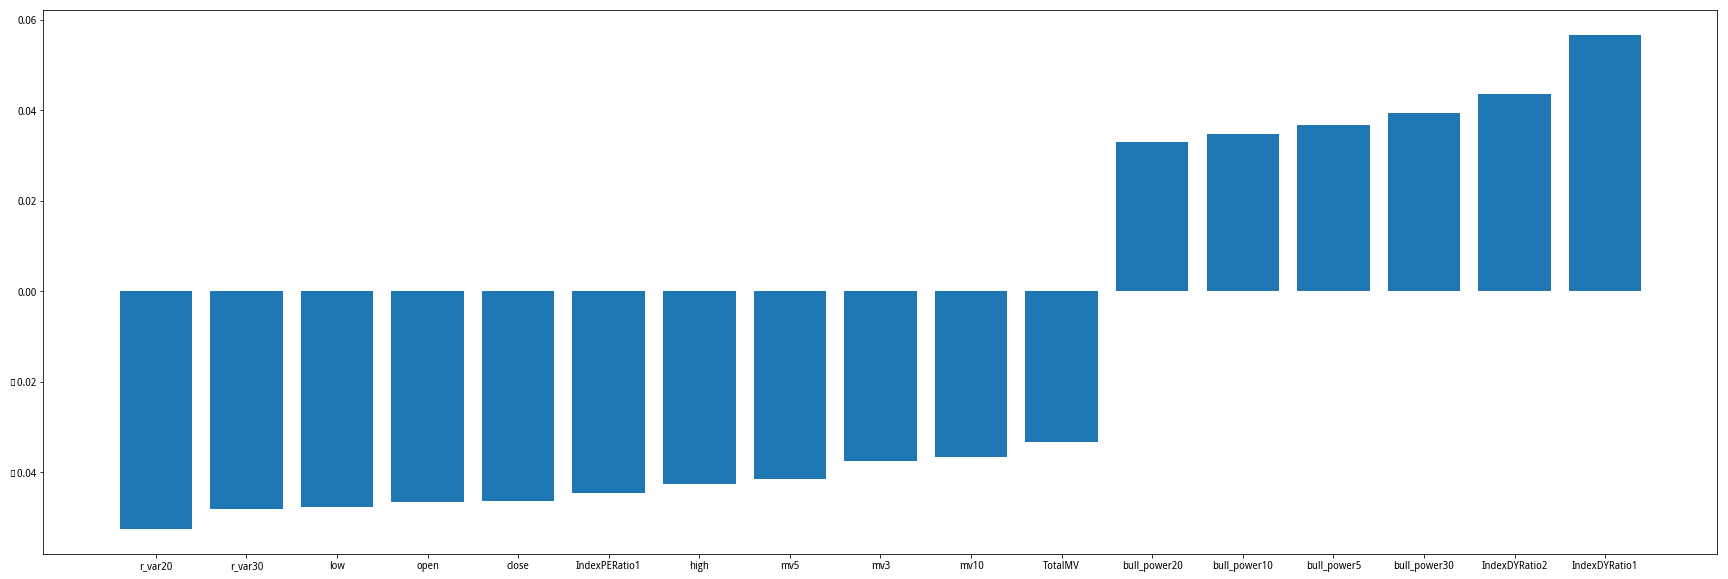

In [15]:
# bar chart
plt.figure(figsize=(30,10))
bar(cov_drop_r.index,cov_drop_r.values)

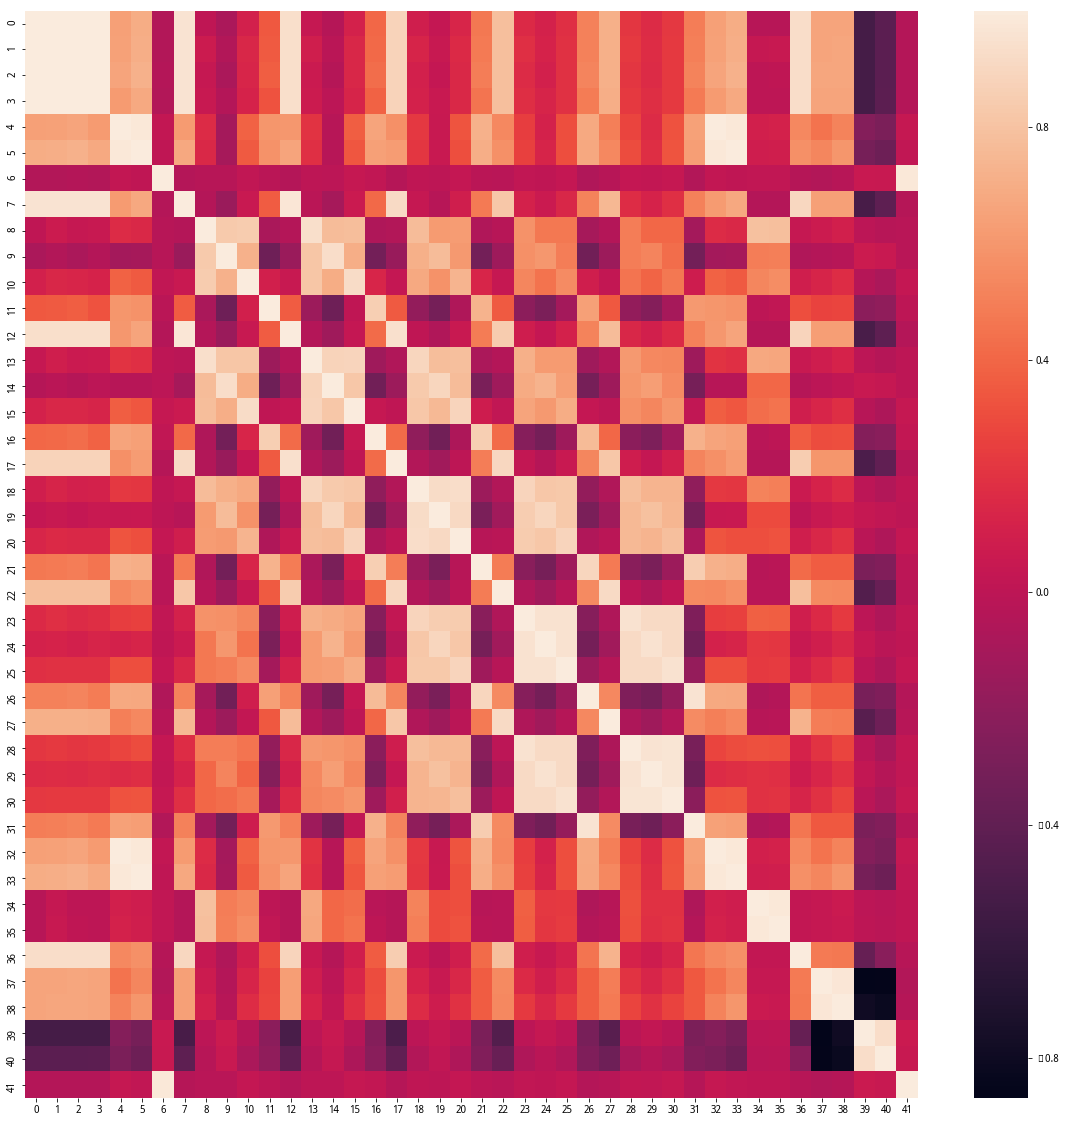

In [16]:
# heap map
f,ax = plt.subplots(figsize=(20,20))
plt.xlabel('a')
ax = sns.heatmap(cov_m,ax =ax)

In [19]:
int(0.8*len(df2))

1828

In [24]:
X = df2.drop(['r','y','rr'],axis=1).iloc[:int(0.8*len(df2)),:]
y = df2['y'].iloc[:int(0.8*len(df2))]
X_select = df2[list(cov_drop_r.index)].iloc[:int(0.8*len(df2))]
X_out_sample = df2.drop(['r','y','rr'],axis=1).iloc[int(0.8*len(df2)):,:]
y_out_sample = df2['y'].iloc[int(0.8*len(df2)):]
X_s_out_sample = df2[list(cov_drop_r.index)].iloc[int(0.8*len(df2)):]

In [25]:
X.shape,y.shape,y_out_sample.shape,X_select.shape,X_s_out_sample.shape

((1828, 40), (1828,), (457,), (1828, 17), (457, 17))

In [26]:
# standardize data
scalar = StandardScaler()
scalar_s = StandardScaler()

scalar.fit(X)
scalar_s.fit(X_select)


X_standard = scalar.transform(X)
X_s_standard = scalar_s.transform(X_select)

X_o_standard = scalar.transform(X_out_sample)
X_s_o_standard = scalar_s.transform(X_s_out_sample)
print(X_standard.shape)
print(X_s_standard.shape)
print(X_o_standard.shape)
print(X_s_o_standard.shape)


(1828, 40)
(1828, 17)
(457, 40)
(457, 17)


In [29]:
model = SVC(C=150)
model_select = SVC(C=150)
model2=SVC(C=200)
X_train,X_test,y_train,y_test = train_test_split(X_standard,y,test_size=0.2)
X_s_train,X_s_test,y_s_train,y_s_test = train_test_split(X_s_standard,y,test_size=0.2)

model.fit(X_train,y_train)
model_select.fit(X_s_train,y_s_train)
model2.fit(X_standard,y)

train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
train_s_score = model_select.score(X_s_train,y_s_train)
test_s_score = model_select.score(X_s_test,y_s_test)

print('train:',train_score)
print('test:',test_score)
print('train select:',train_s_score)
print('test select:',test_s_score)
#print(model.predict(X_test),y_test.values)
# 经过特征选择之后，模型的性能降低，说明特征有所遗漏

train: 0.8057455540355677
test: 0.5409836065573771
train select: 0.6963064295485636
test select: 0.5081967213114754


In [30]:
model.score(X_o_standard,y_out_sample),model_select.score(X_s_o_standard,y_out_sample),model2.score(X_o_standard,y_out_sample)

(0.4814004376367615, 0.5295404814004376, 0.49015317286652077)

In [36]:
# PCA
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(X,y,test_size=0.2)
n = [i for i in range(1,41)]
s_train = []
s_test = []
s_out = []
for i in n:  
    #pca
    pca = PCA(n_components=i,whiten=True)
    pca.fit(X_train_pca)
    #print('explained var ratio:',pca.explained_variance_ratio_)
    X_train = pca.transform(X_train_pca)
    X_test = pca.transform(X_test_pca)
    X_o = pca.transform(X_out_sample)
    
    #standard
    '''
    scalar = StandardScaler()
    scalar.fit(X_train)
    X_train = scalar.transform(X_train)
    X_test = scalar.transform(X_test)
    X_o = scalar.transform(X_o)
    '''
    svc = SVC(C=1)
    svc.fit(X_train,y_train_pca)
    s_train.append(svc.score(X_train,y_train_pca))
    s_test.append(svc.score(X_test,y_test_pca))
    s_out.append(svc.score(X_o,y_out_sample))
    #print(svc.predict(X_test))
    #print(svc.predict(X_o))


In [37]:
s_test,s_out

([0.5191256830601093,
  0.5081967213114754,
  0.5273224043715847,
  0.505464480874317,
  0.5355191256830601,
  0.5163934426229508,
  0.5327868852459017,
  0.5191256830601093,
  0.5081967213114754,
  0.5245901639344263,
  0.5136612021857924,
  0.5491803278688525,
  0.5409836065573771,
  0.546448087431694,
  0.546448087431694,
  0.546448087431694,
  0.5300546448087432,
  0.5245901639344263,
  0.5409836065573771,
  0.5327868852459017,
  0.5163934426229508,
  0.5327868852459017,
  0.5191256830601093,
  0.5245901639344263,
  0.5218579234972678,
  0.5027322404371585,
  0.5355191256830601,
  0.5437158469945356,
  0.5409836065573771,
  0.5437158469945356,
  0.5300546448087432,
  0.5300546448087432,
  0.5382513661202186,
  0.5327868852459017,
  0.5355191256830601,
  0.5355191256830601,
  0.5382513661202186,
  0.5409836065573771,
  0.5437158469945356,
  0.5327868852459017],
 [0.5207877461706784,
  0.4638949671772429,
  0.5185995623632386,
  0.5120350109409191,
  0.5142231947483589,
  0.516411378

ValueError: shape mismatch: objects cannot be broadcast to a single shape

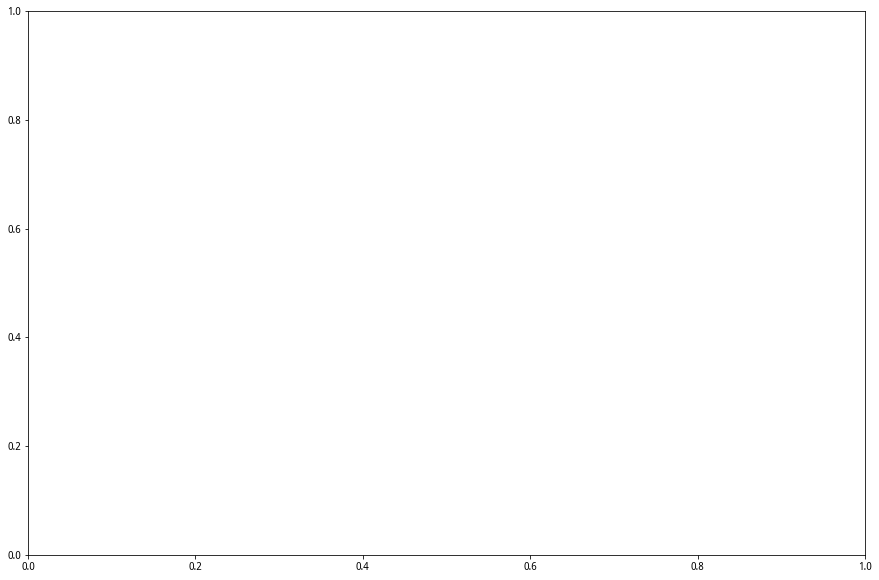

In [38]:
fig,ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar([1+i*4 for i in range(9)],s_train,label='train')
rects2=ax.bar([2+i*4 for i in range(9)],s_test,label='test')
rects2=ax.bar([3+i*4 for i in range(9)],s_out,label='out sampe')
ax.set_xticklabels((1,2,3,4,5,6,7,8,9,10))

ax.legend()
plt.show()

In [39]:
# CV 1 
svc = SVC()
pca = PCA(whiten=True)
pipe = Pipeline(steps=[('pca',pca),('svc',svc)])
parameters = {'svc__C':list(range(1,200,10)),'pca__n_components':range(2,41,1)}
clf = GridSearchCV(pipe, parameters, cv=5)
clf.fit(X,y)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svc__C': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191], 'pca__n_components': range(2, 41)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
cv_res = pd.DataFrame(clf.cv_results_)


In [46]:
res = cv_res[['param_svc__C','param_pca__n_components','rank_test_score','mean_test_score','mean_train_score']].sort_values(by=['param_pca__n_components','param_svc__C'])
res.sort_values(by='rank_test_score')

,param_svc__C,param_pca__n_components,rank_test_score,mean_test_score,mean_train_score
21,11,3,1,0.49,0.57
20,1,3,2,0.49,0.55
420,1,23,3,0.49,0.68
22,21,3,4,0.48,0.57
328,81,18,5,0.48,0.81
23,31,3,5,0.48,0.58
329,91,18,7,0.48,0.82
400,1,22,8,0.48,0.67
360,1,20,8,0.48,0.66
325,51,18,8,0.48,0.79


Text(0.5, 0.92, "cv1: best esti param:{'pca__n_components': 3, 'svc__C': 11},best score:0.49")

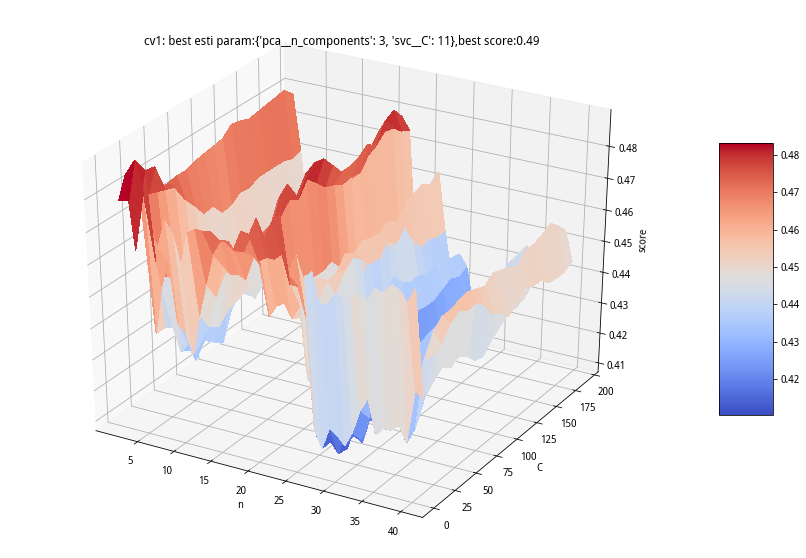

In [47]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
x1 = np.array(cv_res['param_svc__C'].unique())
y1 = np.array(cv_res['param_pca__n_components'].unique())
c,n = np.meshgrid(x1,y1)
z = res['mean_test_score'].values.reshape(c.shape)
surf = ax.plot_surface(n,c,z,rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax.set_xlabel('n')
ax.set_ylabel('C')
ax.set_zlabel('score')
fig.colorbar(surf,shrink=0.5,aspect=5)
plt.title('cv1: best esti param:{},best score:{}'.format(clf.best_params_,round(clf.best_score_,2)))
#ax.plot_surface(cv_res['param_C'],cv_res['param_gama'],cv_res['mean_test_score'])


Text(0.5, 0.92, "cv1: best esti param:{'pca__n_components': 3, 'svc__C': 11},best score:0.49")

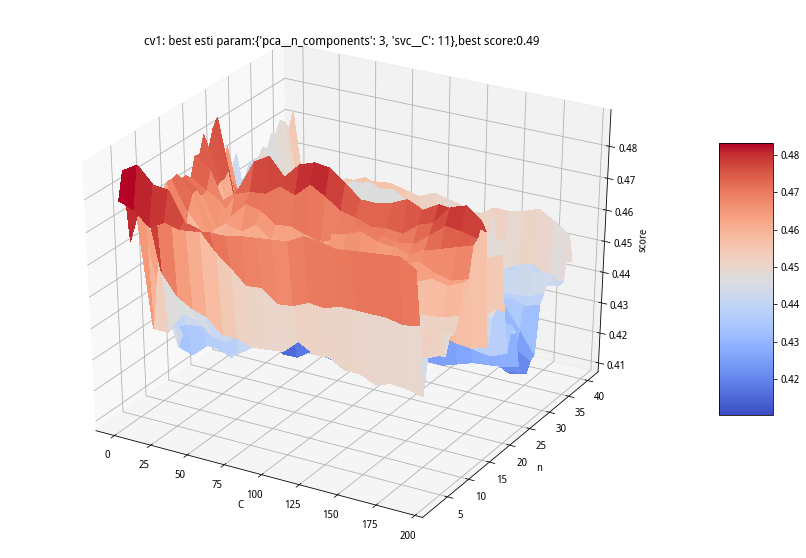

In [48]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
x1 = np.array(cv_res['param_svc__C'].unique())
y1 = np.array(cv_res['param_pca__n_components'].unique())
c,n = np.meshgrid(x1,y1)
z = res['mean_test_score'].values.reshape(c.shape)
surf = ax.plot_surface(c,n,z,rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax.set_xlabel('C')
ax.set_ylabel('n')
ax.set_zlabel('score')
fig.colorbar(surf,shrink=0.5,aspect=5)
plt.title('cv1: best esti param:{},best score:{}'.format(clf.best_params_,round(clf.best_score_,2)))

In [67]:
# CV 2 loose
svc2 = SVC()
pca2 = PCA(whiten=True)
pipe2 = Pipeline(steps=[('pca',pca2),('svc',svc2)])
parameters2 = {'svc__C':[1+0.5*i for i in range(20)],'pca__n_components':range(2,30,1)}
clf2 = GridSearchCV(pipe2, parameters2, cv=5)
clf2.fit(X,y)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svc__C': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5], 'pca__n_components': range(2, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
cv_res2 = pd.DataFrame(clf2.cv_results_)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py

In [69]:
res2 = cv_res2[['param_svc__C','param_pca__n_components','rank_test_score','mean_test_score','mean_train_score']].sort_values(by=['param_pca__n_components','param_svc__C'])
res2.sort_values(by='rank_test_score')

,param_svc__C,param_pca__n_components,rank_test_score,mean_test_score,mean_train_score
409,5.5,22,1,0.50,0.75
365,3.5,20,2,0.50,0.72
410,6,22,3,0.50,0.76
408,5,22,4,0.50,0.75
411,6.5,22,4,0.50,0.76
403,2.5,22,6,0.50,0.72
387,4.5,21,6,0.50,0.74
331,6.5,18,8,0.50,0.72
362,2,20,8,0.50,0.69
442,2,24,8,0.50,0.72


Text(0.5, 0.92, "cv2: best esti param:{'pca__n_components': 22, 'svc__C': 5.5},best score:0.5")

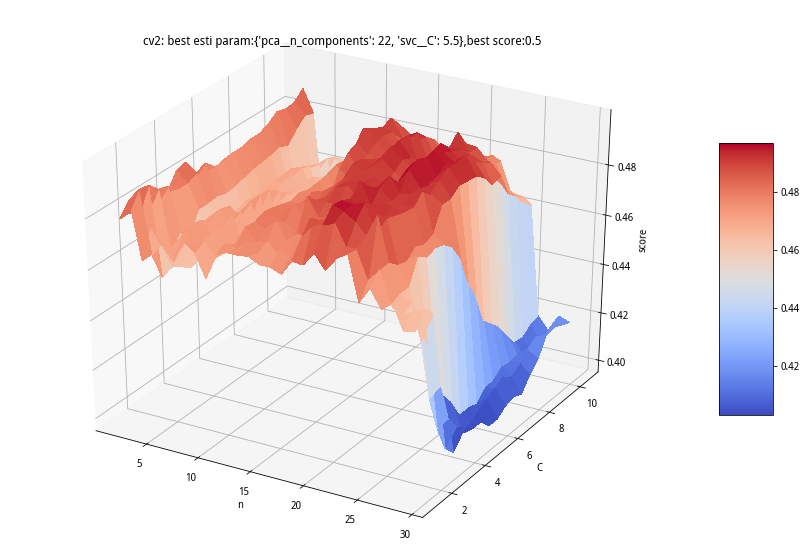

In [70]:
fig2 = plt.figure(figsize=(15,10))
ax2 = plt.axes(projection='3d')
x2 = np.array(cv_res2['param_svc__C'].unique())
y2 = np.array(cv_res2['param_pca__n_components'].unique())
c2,n2 = np.meshgrid(x2,y2)
z2 = res2['mean_test_score'].values.reshape(c2.shape)
surf2 = ax2.plot_surface(n2,c2,z2,rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax2.set_xlabel('n')
ax2.set_ylabel('C')
ax2.set_zlabel('score')
fig2.colorbar(surf2,shrink=0.5,aspect=5)
plt.title('cv2: best esti param:{},best score:{}'.format(clf2.best_params_,round(clf2.best_score_,2)))

Text(0.5, 0.92, "cv2: best esti param:{'pca__n_components': 22, 'svc__C': 5.5},best score:0.5")

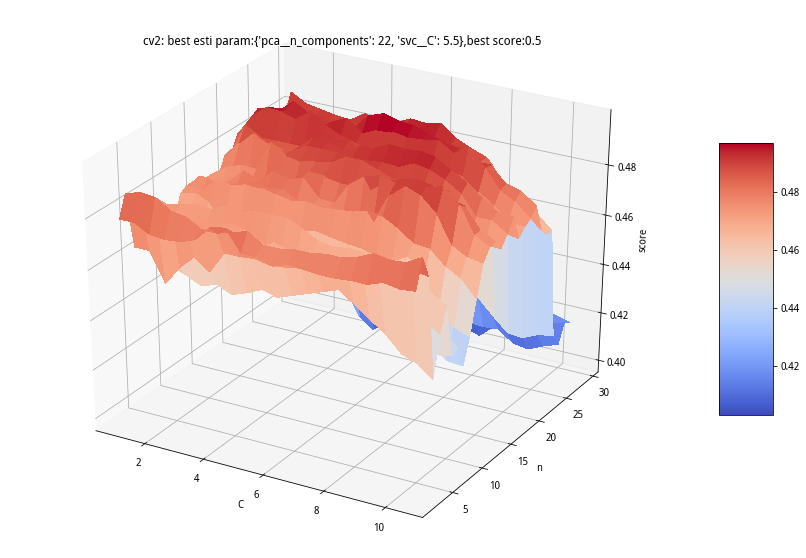

In [71]:
fig2 = plt.figure(figsize=(15,10))
ax2 = plt.axes(projection='3d')
x2 = np.array(cv_res2['param_svc__C'].unique())
y2 = np.array(cv_res2['param_pca__n_components'].unique())
c2,n2 = np.meshgrid(x2,y2)
z2 = res2['mean_test_score'].values.reshape(c2.shape)
surf2 = ax2.plot_surface(c2,n2,z2,rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax2.set_xlabel('C')
ax2.set_ylabel('n')
ax2.set_zlabel('score')
fig2.colorbar(surf2,shrink=0.5,aspect=5)
plt.title('cv2: best esti param:{},best score:{}'.format(clf2.best_params_,round(clf2.best_score_,2)))

In [77]:
# CV 3  middle loose
svc3 = SVC()
pca3 = PCA(whiten=True)
pipe3 = Pipeline(steps=[('pca',pca3),('svc',svc3)])
parameters3 = {'svc__C':[90+1*i for i in range(20)],'pca__n_components':range(10,30)}
clf3 = GridSearchCV(pipe3, parameters3, cv=5)
clf3.fit(X,y)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svc__C': [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109], 'pca__n_components': range(10, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [78]:
cv_res3 = pd.DataFrame(clf3.cv_results_)
res3 = cv_res3[['param_svc__C','param_pca__n_components','rank_test_score','mean_test_score','mean_train_score']].sort_values(by=['param_pca__n_components','param_svc__C'])
res3.sort_values(by='rank_test_score')

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_svc__C,param_pca__n_components,rank_test_score,mean_test_score,mean_train_score
160,90,18,1,0.48,0.82
162,92,18,2,0.48,0.82
161,91,18,2,0.48,0.82
165,95,18,4,0.48,0.82
164,94,18,4,0.48,0.82
163,93,18,4,0.48,0.82
166,96,18,7,0.48,0.82
170,100,18,8,0.48,0.82
169,99,18,8,0.48,0.82
168,98,18,8,0.48,0.82


Text(0.5, 0.92, "cv3: best esti param:{'pca__n_components': 18, 'svc__C': 90},best score:0.48")

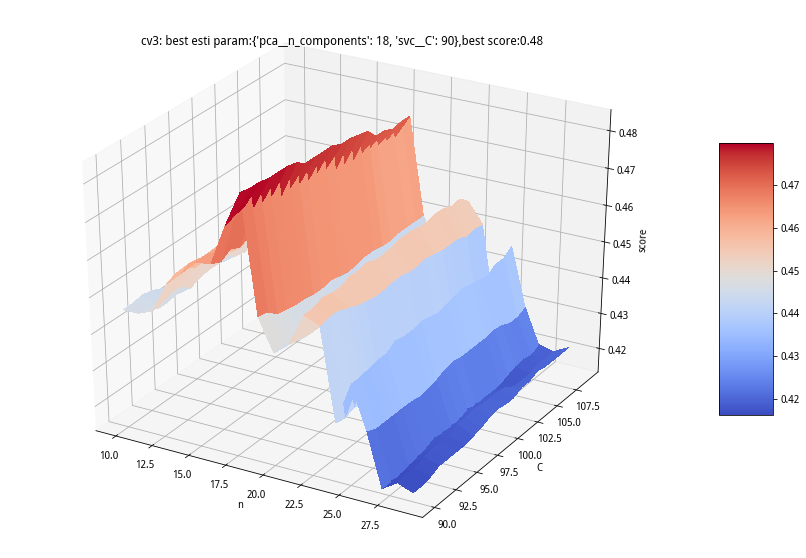

In [79]:
fig3 = plt.figure(figsize=(15,10))
ax3 = plt.axes(projection='3d')
x3 = np.array(cv_res3['param_svc__C'].unique())
y3 = np.array(cv_res3['param_pca__n_components'].unique())
c3,n3 = np.meshgrid(x3,y3)
z3 = res3['mean_test_score'].values.reshape(c3.shape)
surf3 = ax3.plot_surface(n3,c3,z3,rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax3.set_xlabel('n')
ax3.set_ylabel('C')
ax3.set_zlabel('score')
fig3.colorbar(surf3,shrink=0.5,aspect=5)
plt.title('cv3: best esti param:{},best score:{}'.format(clf3.best_params_,round(clf3.best_score_,2)))

Text(0.5, 0.92, "cv3: best esti param:{'pca__n_components': 18, 'svc__C': 90},best score:0.48")

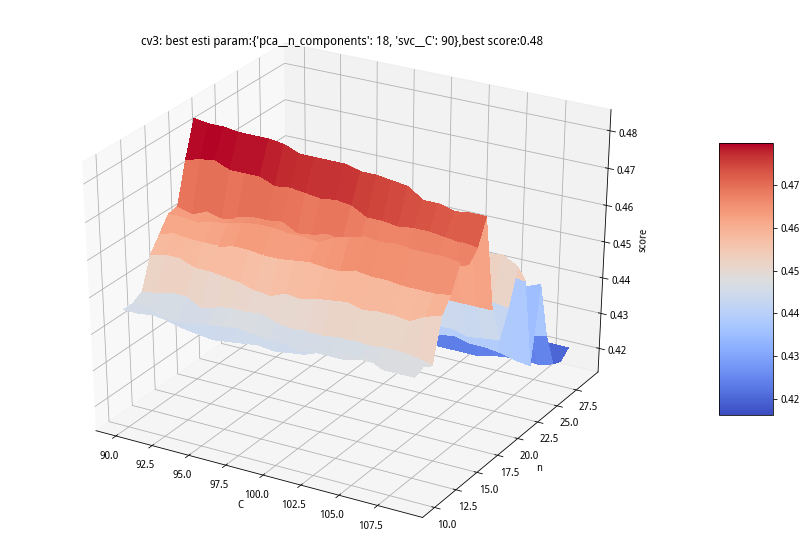

In [80]:
fig3 = plt.figure(figsize=(15,10))
ax3 = plt.axes(projection='3d')
x3 = np.array(cv_res3['param_svc__C'].unique())
y3 = np.array(cv_res3['param_pca__n_components'].unique())
c3,n3 = np.meshgrid(x3,y3)
z3 = res3['mean_test_score'].values.reshape(c3.shape)
surf3 = ax3.plot_surface(c3,n3,z3,rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax3.set_xlabel('C')
ax3.set_ylabel('n')
ax3.set_zlabel('score')
fig3.colorbar(surf3,shrink=0.5,aspect=5)
plt.title('cv3: best esti param:{},best score:{}'.format(clf3.best_params_,round(clf3.best_score_,2)))

In [81]:
# CV 4  tight
svc4 = SVC()
pca4 = PCA(whiten=True)
pipe4 = Pipeline(steps=[('pca',pca4),('svc',svc4)])
parameters4 = {'svc__C':[185+1*i for i in range(25)],'pca__n_components':range(10,31)}
clf4 = GridSearchCV(pipe4, parameters4, cv=5)
clf4.fit(X,y)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svc__C': [185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209], 'pca__n_components': range(10, 31)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [82]:
cv_res4 = pd.DataFrame(clf4.cv_results_)
res4 = cv_res4[['param_svc__C','param_pca__n_components','rank_test_score','mean_test_score','mean_train_score']].sort_values(by=['param_pca__n_components','param_svc__C'])
res4.sort_values(by='rank_test_score')

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_svc__C,param_pca__n_components,rank_test_score,mean_test_score,mean_train_score
181,191,17,1,0.48,0.83
175,185,17,2,0.48,0.83
177,187,17,2,0.48,0.83
182,192,17,2,0.48,0.83
178,188,17,2,0.48,0.83
180,190,17,2,0.48,0.83
176,186,17,7,0.48,0.83
179,189,17,7,0.48,0.83
183,193,17,9,0.48,0.83
195,205,17,9,0.48,0.83


Text(0.5, 0.92, "cv4: best esti param:{'pca__n_components': 17, 'svc__C': 191},best score:0.48")

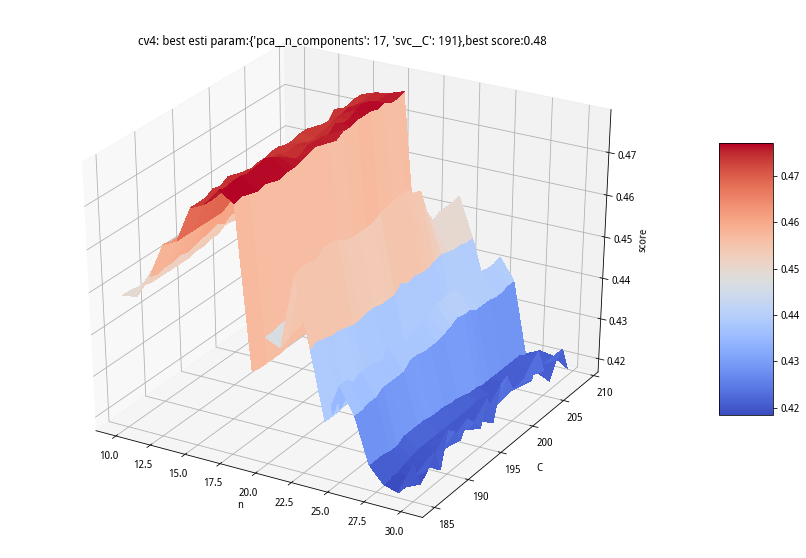

In [83]:
fig4 = plt.figure(figsize=(15,10))
ax4 = plt.axes(projection='3d')
x4 = np.array(cv_res4['param_svc__C'].unique())
y4 = np.array(cv_res4['param_pca__n_components'].unique())
c4,n4 = np.meshgrid(x4,y4)
z4 = res4['mean_test_score'].values.reshape(c4.shape)
surf4 = ax4.plot_surface(n4,c4,z4,rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax4.set_xlabel('n')
ax4.set_ylabel('C')
ax4.set_zlabel('score')
fig4.colorbar(surf4,shrink=0.5,aspect=5)
plt.title('cv4: best esti param:{},best score:{}'.format(clf4.best_params_,round(clf4.best_score_,2)))

Text(0.5, 0.92, "cv4: best esti param:{'pca__n_components': 17, 'svc__C': 191},best score:0.48")

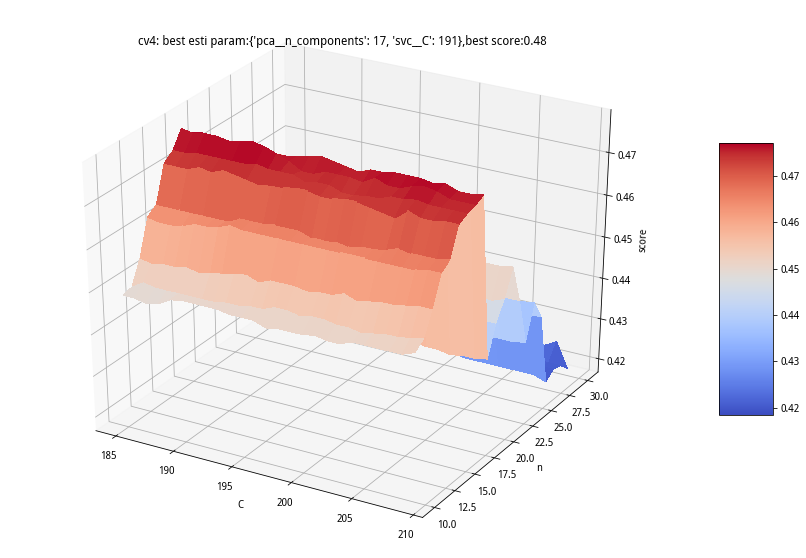

In [84]:
fig4 = plt.figure(figsize=(15,10))
ax4 = plt.axes(projection='3d')
x4 = np.array(cv_res4['param_svc__C'].unique())
y4 = np.array(cv_res4['param_pca__n_components'].unique())
c4,n4 = np.meshgrid(x4,y4)
z4 = res4['mean_test_score'].values.reshape(c4.shape)
surf4 = ax4.plot_surface(c4,n4,z4,rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax4.set_xlabel('C')
ax4.set_ylabel('n')
ax4.set_zlabel('score')
fig4.colorbar(surf4,shrink=0.5,aspect=5)
plt.title('cv4: best esti param:{},best score:{}'.format(clf4.best_params_,round(clf4.best_score_,2)))

In [85]:
print('test score on out samples, time duration: ')
print('cv1: ',clf.score(X_out_sample,y_out_sample),'best params:',clf.best_params_)
print('cv2 :',clf2.score(X_out_sample,y_out_sample),'best params:',clf2.best_params_)
print('cv3: ',clf3.score(X_out_sample,y_out_sample),'best params:',clf3.best_params_)
print('cv4: ',clf4.score(X_out_sample,y_out_sample),'best params:',clf4.best_params_)

test score on out samples, time duration: 
cv1:  0.5207877461706784 best params: {'pca__n_components': 3, 'svc__C': 11}
cv2 : 0.5339168490153173 best params: {'pca__n_components': 22, 'svc__C': 5.5}
cv3:  0.5251641137855579 best params: {'pca__n_components': 18, 'svc__C': 90}
cv4:  0.49452954048140046 best params: {'pca__n_components': 17, 'svc__C': 191}
